# Calorie expenditure during road cycling

In this project I'll try to answer two questions:

    - What variables affect calorie expenditure the most when we're cycling?
    - Can this caloric expenditure be accurately predicted for any given route?
    
To answer them I'll be using a dataset of my cycling rides from 2016 up to this day, courtesy of **SportTracks**'s elegantly simple data export options.

## 1. Data wrangling

Since our data is in csv format, we'll begin our data exploration by loading it into a dataframe object.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('workouts.csv', encoding='utf-8', )

In [3]:
df.head()

,Nombre,Inicio,Deporte,Distancia,Duración,Velocidad media,Calorías,Calorías (/hora),Pulso promedio,Aumento del Desnivel,Temperatura
0,Cycling: Road,2021-05-30 11:09:26,Carretera,"20,04 km",42:26:00,"28,3 km/h",506.0,715.0,144.0,152,"22,3"
1,Cycling: Road,2021-05-28 8:51:04,Carretera,"100,29 km",3:21:59,"29,8 km/h",1799.0,534.0,131.0,610,"16,6"
2,Cycling: Road,2021-05-26 8:51:07,Carretera,"124,78 km",4:44:16,"26,3 km/h",2741.0,579.0,140.0,1751,"15,9"
3,Cycling: Road,2021-05-24 10:46:51,Carretera,"36,25 km",1:18:23,"27,7 km/h",643.0,492.0,124.0,186,"16,2"
4,Cycling: Mountain,2021-05-23 9:20:16,Montaña,"78,61 km",3:10:01,"24,8 km/h",2031.0,641.0,143.0,381,"13,9"


In [4]:
#Let's check for missing values. Since very few activities have missing data we can safely drop them.

df.isnull().sum()

Nombre                  0
Inicio                  0
Deporte                 0
Distancia               0
Duración                0
Velocidad media         4
Calorías                4
Calorías (/hora)        4
Pulso promedio          8
Aumento del Desnivel    0
Temperatura             3
dtype: int64

In [5]:
#Dropping the rows with missing data.

df.dropna(axis=0, how='any', inplace=True)

In [6]:
#To clean up our dataframe and prevent any future naming issues, let's rename the columns.

df.rename(columns={'Nombre':'name',
                      'Inicio':'start',
                      'Deporte': 'sport',
                      'Distancia':'distance',
                      'Duración':'duration',
                      'Velocidad media':'avg_speed',
                      'Calorías':'calories',
                      'Calorías (/hora)':'cals_per_hour',
                      'Pulso promedio':'heartrate',
                      'Aumento del Desnivel':'climb',
                      'Temperatura':'temp'}, inplace=True)

In [7]:
df.head()

,name,start,sport,distance,duration,avg_speed,calories,cals_per_hour,heartrate,climb,temp
0,Cycling: Road,2021-05-30 11:09:26,Carretera,"20,04 km",42:26:00,"28,3 km/h",506.0,715.0,144.0,152,"22,3"
1,Cycling: Road,2021-05-28 8:51:04,Carretera,"100,29 km",3:21:59,"29,8 km/h",1799.0,534.0,131.0,610,"16,6"
2,Cycling: Road,2021-05-26 8:51:07,Carretera,"124,78 km",4:44:16,"26,3 km/h",2741.0,579.0,140.0,1751,"15,9"
3,Cycling: Road,2021-05-24 10:46:51,Carretera,"36,25 km",1:18:23,"27,7 km/h",643.0,492.0,124.0,186,"16,2"
4,Cycling: Mountain,2021-05-23 9:20:16,Montaña,"78,61 km",3:10:01,"24,8 km/h",2031.0,641.0,143.0,381,"13,9"


In [8]:
#The 'name column' doesn't give us any meaningful information so we'll drop it.

df.drop('name',axis=1, inplace=True)

In [9]:
#We can also drop 'cals_per hour' since it's a combination of two existing columns.

df.drop('cals_per_hour',axis=1, inplace=True)

In [10]:
#Some of our columns need to be typecasted into more useful formats. Let's get to it.

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 0 to 813
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   start      800 non-null    object 
 1   sport      800 non-null    object 
 2   distance   800 non-null    object 
 3   duration   800 non-null    object 
 4   avg_speed  800 non-null    object 
 5   calories   800 non-null    float64
 6   heartrate  800 non-null    float64
 7   climb      800 non-null    int64  
 8   temp       800 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 62.5+ KB


In [11]:
#Converting 'start' to datetime format. Using the correct formal is crucial at this point.

df['start'] = pd.to_datetime(df['start'], format='%Y-%m-%d %H:%M:%S')

In [12]:
#The column Dtype has been changed successfully.

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 0 to 813
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   start      800 non-null    datetime64[ns]
 1   sport      800 non-null    object        
 2   distance   800 non-null    object        
 3   duration   800 non-null    object        
 4   avg_speed  800 non-null    object        
 5   calories   800 non-null    float64       
 6   heartrate  800 non-null    float64       
 7   climb      800 non-null    int64         
 8   temp       800 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 62.5+ KB


In [13]:
#'Sport' is a categorical variable. Let's see the values it can have.

df['sport'].value_counts()

Carretera     538
Montaña       129
Ciclismo       69
Virtual        59
Interiores      4
Entrenador      1
Name: sport, dtype: int64

In [14]:
#Those 6 categories can be summed up into just 3 (road, mountain, indoor).

df['sport'].replace('Carretera','road',inplace=True)
df['sport'].replace('Montaña','mountain',inplace=True)
df['sport'].replace('Ciclismo','road',inplace=True)
df['sport'].replace('Virtual','indoor',inplace=True)
df['sport'].replace('Interiores','indoor',inplace=True)
df['sport'].replace('Entrenador','indoor',inplace=True)

In [15]:
#Let's check if the string replace has worked successfully.

df['sport'].value_counts()

road        607
mountain    129
indoor       64
Name: sport, dtype: int64

In [16]:
#To convert 'distance' into a float we'll simply use string replace.

df['distance'] = df['distance'].str.replace(' km','')
df['distance'] = df['distance'].str.replace(',','.') #Replacing dots with commas.
df['distance'] = df['distance'].astype(float) #Finally typecasting as float.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 0 to 813
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   start      800 non-null    datetime64[ns]
 1   sport      800 non-null    object        
 2   distance   800 non-null    float64       
 3   duration   800 non-null    object        
 4   avg_speed  800 non-null    object        
 5   calories   800 non-null    float64       
 6   heartrate  800 non-null    float64       
 7   climb      800 non-null    int64         
 8   temp       800 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 62.5+ KB


In [18]:
df.head()

,start,sport,distance,duration,avg_speed,calories,heartrate,climb,temp
0,2021-05-30 11:09:26,road,20.04,42:26:00,"28,3 km/h",506.0,144.0,152,"22,3"
1,2021-05-28 08:51:04,road,100.29,3:21:59,"29,8 km/h",1799.0,131.0,610,"16,6"
2,2021-05-26 08:51:07,road,124.78,4:44:16,"26,3 km/h",2741.0,140.0,1751,"15,9"
3,2021-05-24 10:46:51,road,36.25,1:18:23,"27,7 km/h",643.0,124.0,186,"16,2"
4,2021-05-23 09:20:16,mountain,78.61,3:10:01,"24,8 km/h",2031.0,143.0,381,"13,9"


In [19]:
#This function will get rid of surplus characters.

def time_add(x):
    if len(x) == 8:
        return '00:' + x[:5]
    elif len(x) == 7:
        return '0' + x
    elif len(x) == 4:
        return '00:0' + x
    elif len(x) == 5:
        return '00:' + x
    else:
        return x

In [20]:
#Applying the function.

df['duration'] = df['duration'].apply(time_add)

In [21]:
#Now we can finally convert it to a TimeDelta object.

df['duration'] = pd.to_timedelta(df['duration'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 0 to 813
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype          
---  ------     --------------  -----          
 0   start      800 non-null    datetime64[ns] 
 1   sport      800 non-null    object         
 2   distance   800 non-null    float64        
 3   duration   800 non-null    timedelta64[ns]
 4   avg_speed  800 non-null    object         
 5   calories   800 non-null    float64        
 6   heartrate  800 non-null    float64        
 7   climb      800 non-null    int64          
 8   temp       800 non-null    object         
dtypes: datetime64[ns](1), float64(3), int64(1), object(3), timedelta64[ns](1)
memory usage: 62.5+ KB


In [63]:
#To perform a detailed analysis it would be better to have the duration in minutes (int). Let's do it.

df['duration'] = df['duration'].dt.total_seconds().div(60).astype(int)

In [64]:
df.head()

,start,sport,distance,duration,avg_speed,calories,heartrate,climb,temp
0,2021-05-30 11:09:26,road,20.04,42,28.3,506.0,144.0,152,22.3
1,2021-05-28 08:51:04,road,100.29,201,29.8,1799.0,131.0,610,16.6
2,2021-05-26 08:51:07,road,124.78,284,26.3,2741.0,140.0,1751,15.9
3,2021-05-24 10:46:51,road,36.25,78,27.7,643.0,124.0,186,16.2
4,2021-05-23 09:20:16,mountain,78.61,190,24.8,2031.0,143.0,381,13.9


In [23]:
#The last column that we need to work on is 'avg_speed'. Let's convert it to a float.

df['avg_speed'] = df['avg_speed'].str.replace(' km/h','')
df['avg_speed'] = df['avg_speed'].str.replace(',','.')
df['avg_speed'] = df['avg_speed'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 0 to 813
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype          
---  ------     --------------  -----          
 0   start      800 non-null    datetime64[ns] 
 1   sport      800 non-null    object         
 2   distance   800 non-null    float64        
 3   duration   800 non-null    timedelta64[ns]
 4   avg_speed  800 non-null    float64        
 5   calories   800 non-null    float64        
 6   heartrate  800 non-null    float64        
 7   climb      800 non-null    int64          
 8   temp       800 non-null    object         
dtypes: datetime64[ns](1), float64(4), int64(1), object(2), timedelta64[ns](1)
memory usage: 62.5+ KB


In [24]:
#Typecasting 'temp'.

df['temp'] = df['temp'].astype(str)
df['temp'] = df['temp'].str.replace(',','.')
df['temp'] = df['temp'].astype(float)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 0 to 813
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype          
---  ------     --------------  -----          
 0   start      800 non-null    datetime64[ns] 
 1   sport      800 non-null    object         
 2   distance   800 non-null    float64        
 3   duration   800 non-null    timedelta64[ns]
 4   avg_speed  800 non-null    float64        
 5   calories   800 non-null    float64        
 6   heartrate  800 non-null    float64        
 7   climb      800 non-null    int64          
 8   temp       800 non-null    float64        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1), timedelta64[ns](1)
memory usage: 62.5+ KB


## 2. Data exploration

Now that all our columns are nice and tidy we can finally take a good look at our data.
Let's begin by importing our favourite libraries.

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
df.describe()

,distance,duration,avg_speed,calories,heartrate,climb,temp
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,45.076225,109.228750,24.776125,1005.875000,133.875000,455.420000,17.439125
std,26.918241,62.432112,4.127325,584.823373,7.815416,392.482987,6.484857
min,0.080000,0.000000,8.100000,2.000000,96.000000,0.000000,-0.500000
25%,24.930000,63.000000,22.700000,592.500000,129.000000,194.000000,12.600000
50%,40.525000,99.500000,25.400000,904.500000,134.000000,335.500000,16.500000
75%,58.065000,140.000000,27.000000,1274.250000,139.000000,591.500000,22.100000
max,204.640000,450.000000,37.700000,4295.000000,160.000000,2602.000000,35.500000


In [67]:
#Correlation.

df.corr()

,distance,duration,avg_speed,calories,heartrate,climb,temp
distance,1.000000,0.961330,0.171813,0.940221,0.293689,0.738512,-0.111073
duration,0.961330,1.000000,-0.053964,0.970008,0.277465,0.820625,-0.122798
avg_speed,0.171813,-0.053964,1.000000,-0.023561,0.085935,-0.146379,0.153999
calories,0.940221,0.970008,-0.023561,1.000000,0.428322,0.840935,-0.111749
heartrate,0.293689,0.277465,0.085935,0.428322,1.000000,0.368204,-0.023022
climb,0.738512,0.820625,-0.146379,0.840935,0.368204,1.000000,-0.014906
temp,-0.111073,-0.122798,0.153999,-0.111749,-0.023022,-0.014906,1.000000


<AxesSubplot:>

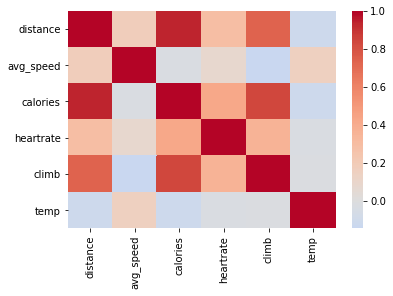

In [61]:
sns.heatmap(df.corr(), center=0, cmap='coolwarm')

We can see that both **duration** and **distance** seem to be good predictors for caloric expenditure, with **climb** in a third place. They will be further explored in the future.

## 3. Data visualization

In [102]:
import cufflinks as cf
import plotly.express as px
from pylab import rcParams 

cf.go_offline()

pd.options.plotting.backend='plotly'

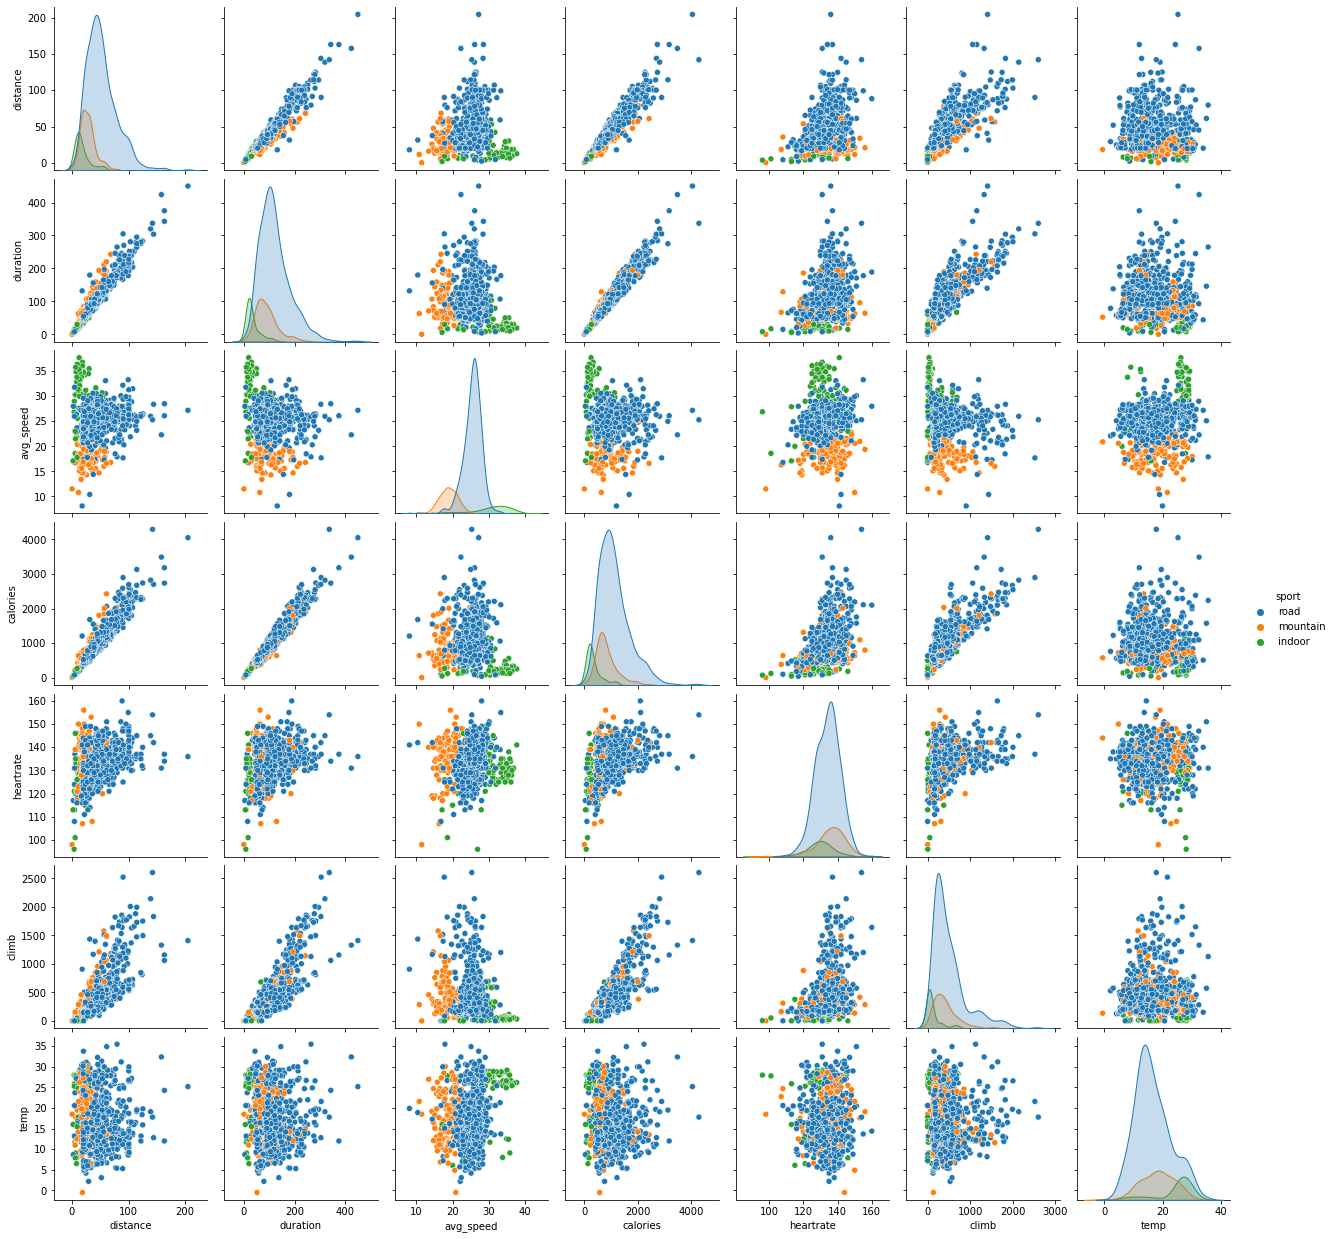

In [73]:
#We'll begin with a simple pair plot to visually inspect the relationships between variables.

sns.pairplot(data=df, hue = 'sport')

It's easy to see that most activities were road bike rides, as were the longest and hardest. Note how the variance in indoor rides is much smaller than for the other sports.

Let's explore the relationship between *duration, distance, climb* and our target variable (*calories*). Displaying a regression plot for every variable will allow us to better understand which one could be the best predictor and why.

In [103]:
#Setting up our desired figure size.

rcParams["figure.figsize"] = [12, 8]

*Duration* seems to be the best predictor, since it has few outliers and a variance that's far lower than that of the other variables. The confidence interval seems to be quite tight.

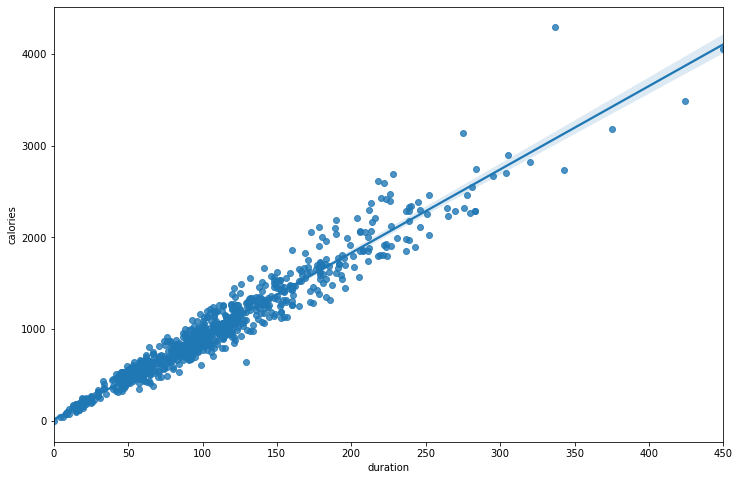

In [105]:
_ = sns.regplot(data=df, x='duration', y='calories')

*Distance* is also a good predictor, but the variance is higher than it was for *duration*. The outliers don't seem to be an issue.

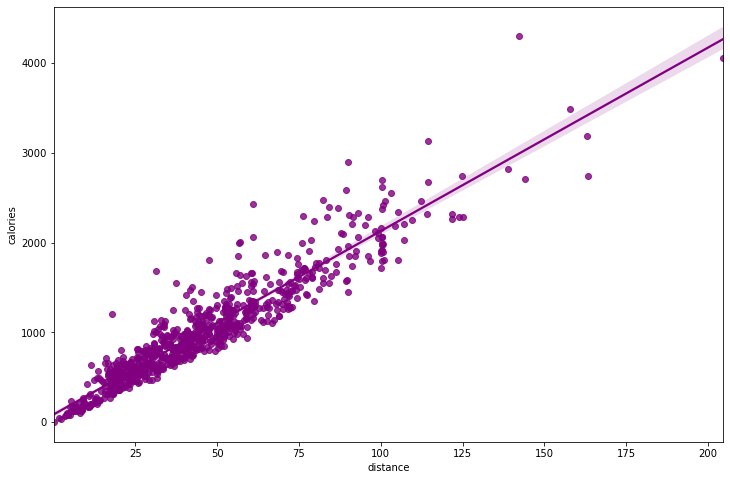

In [107]:
_ = sns.regplot(data=df, x='distance', y='calories', color='purple')

*Climb* could be a decent enough predictor, but the high variability and the presence of many outliers severely restrict its usefulness when we compare it with the previous variables. I won't be using it for my prediction for this very reason.

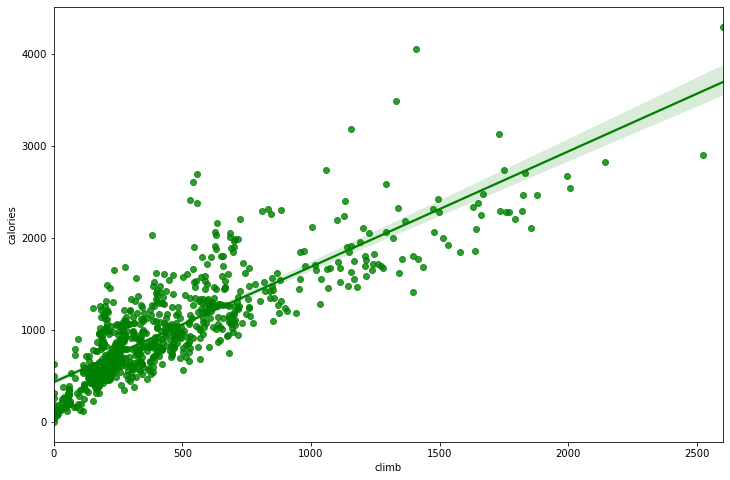

In [94]:
_ = sns.regplot(data=df, x='climb', y='calories', color='green')

As this chart shows, the correlation between *duration* and *calories* is quite constant regardless of sport. It's interesting to note how indoor rides have the least variability, since they are performed in a controlled environment.

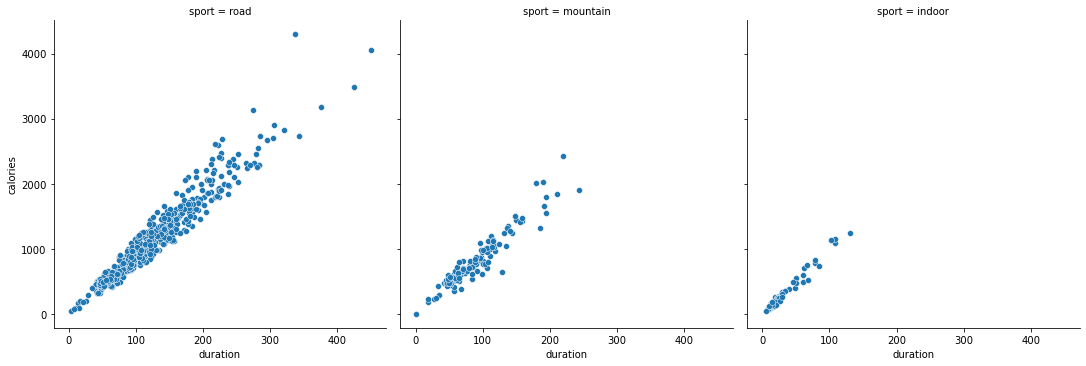

In [113]:
_ = sns.relplot(data=df, x='duration', y='calories', col='sport')

In [116]:
_ = df.iplot(kind='scatter', x='duration', y='calories', mode='markers', categories='sport')

In [121]:
px.scatter(df, x='duration', y='calories', color='sport')

## 4. Regression and prediction

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
df_clean = df[['distance', 'avg_speed', 'calories', 'heartrate', 'climb', 'temp']]

In [49]:
X = StandardScaler().fit_transform(df_clean)

In [50]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [51]:
pca = PCA()

In [52]:
pc = pca.fit_transform(X)

In [57]:
lr_pca = LogisticRegression(max_iter=10000).fit(pc[:,:6], df_clean.calories)

In [58]:
lr_pca.score(pc,df_clean.calories)

0.1225